# This jupyter notebook is prepared by Joseph Torres

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [6]:
from google.colab import drive

file_name = '/content/hr_data_.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    df = pd.read_csv(file)

df.shape

(8955, 15)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [7]:
rows = df.iloc[0:7]
rows1 = df.iloc[-7:]

print(rows)

print(rows1)

   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   
5          12        25619   city_61                   0.913   Male   
6          15         6588  city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has relevent experience       no

### 1.4 Show if any column has null values (0.5pt)

In [8]:
df.isnull().any()

Unnamed: 0                False
enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool

### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

'\nWhen it comes to classification, imbalanced classes can pose several issues.\nOne such issue is that it can bias the model towards the majority class, resulting in \npoor performance on the minority class. This is because the model will \nhave more exposure to the majority class during training \nand may not learn enough about the minority class to make accurate predictions.\n'

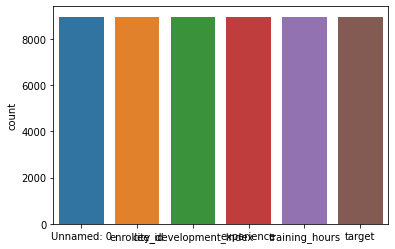

In [10]:
sns.countplot(data = df)

'''
When it comes to classification, imbalanced classes can pose several issues.
One such issue is that it can bias the model towards the majority class, resulting in 
poor performance on the minority class. This is because the model will 
have more exposure to the majority class during training 
and may not learn enough about the minority class to make accurate predictions.
'''



# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

<AxesSubplot:>

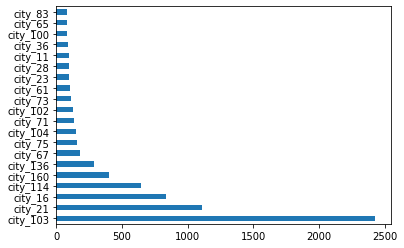

In [11]:
df['city'].value_counts()[:20].plot(kind='barh')

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [12]:
a = df['city'].value_counts()['city_103']
b = df['city'].value_counts()['city_21']
c = df['city'].value_counts()['city_16']
d = df['city'].value_counts()['city_114']

print("City_103:", a)
print("City_21:", b)
print("City_16:", c)
print("City_114:", d)

remain_city = df.shape[0] - (a+b+c+d)
print("Remaining Citiies:", remain_city)


City_103: 2426
City_21: 1111
City_16: 836
City_114: 648
Remaining Citiies: 3934




```
# This is formatted as code
```

### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [13]:
cities = ["city_103", "city_21", "city_16", "city_114"]


filtered_mask = ~df['city'].isin(cities)
df.loc[filtered_mask, 'city'] = "city_others"

df.head()





,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [14]:
print(df['city'].isin(cities).any())

df.head()

True


,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

<AxesSubplot:>

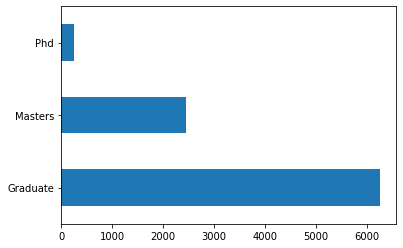

In [15]:
df['education_level'].value_counts().plot(kind='barh')

### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [16]:
def replace_labels(dataframe, column_name, label_dict):
    # Create a copy of the DataFrame to avoid modifying the original
    new_dataframe = dataframe.copy()

    # Replace the labels in the specified column
    new_dataframe[column_name] = new_dataframe[column_name].replace(label_dict)

    return new_dataframe

# 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [17]:

ordinalDict = {'Graduate': 0, 'Masters':1, 'Phd': 2}

df = replace_labels(df, 'education_level', ordinalDict)

### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [18]:
df['education_level']

0       0
1       1
2       0
3       0
4       0
       ..
8950    0
8951    1
8952    0
8953    0
8954    0
Name: education_level, Length: 8955, dtype: int64

## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)




50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

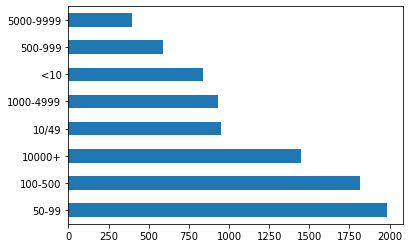

In [19]:
df['company_size'].value_counts().plot(kind='barh')
df['company_size'].value_counts()

### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [20]:
ordinalDict2 = {'<10': 0, '10/49': 1, '50-99':2, '100-500': 3, '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7}

df = replace_labels(df, 'company_size', ordinalDict2)

### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [21]:
df['company_size']

0       2
1       2
2       0
3       2
4       6
       ..
8950    3
8951    2
8952    3
8953    1
8954    2
Name: company_size, Length: 8955, dtype: int64

## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

<AxesSubplot:>

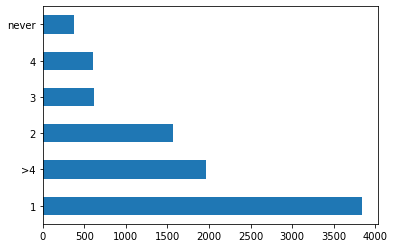

In [22]:
df['last_new_job'].value_counts().plot(kind='barh')

### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [23]:
ordinalDict3 = {'never': 0, '1': 1, '2':2, '3':3, '4': 4, '>4':5}

df = replace_labels(df, 'last_new_job', ordinalDict3)

### 2.4.3 Show the updated values (1pt)

In [24]:
df['last_new_job']

0       5
1       4
2       5
3       1
4       1
       ..
8950    1
8951    1
8952    3
8953    1
8954    4
Name: last_new_job, Length: 8955, dtype: int64

## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [25]:
df = df.drop(columns=['Unnamed: 0', 'enrollee_id'])

In [26]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0
3,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0


## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['number']).columns])

In [28]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_others,0.654691,Male,No relevent experience,no_enrollment,0.0,STEM,0.714286,0.285714,Pvt Ltd,1.0,0.137313,0.0
1,city_others,0.636727,Male,Has relevent experience,no_enrollment,0.5,STEM,1.000000,0.285714,Funded Startup,0.8,0.020896,0.0
2,city_others,0.626747,Male,Has relevent experience,no_enrollment,0.0,STEM,0.619048,0.000000,Pvt Ltd,1.0,0.050746,1.0
3,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.333333,0.285714,Pvt Ltd,0.2,0.134328,1.0
4,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.238095,0.857143,Pvt Ltd,0.2,0.319403,0.0


### 2.6.2 Show some of the scaled records. (1pt)

In [29]:
df['company_size']
df['education_level']

0       0.0
1       0.5
2       0.0
3       0.0
4       0.0
       ... 
8950    0.0
8951    0.5
8952    0.0
8953    0.0
8954    0.0
Name: education_level, Length: 8955, dtype: float64

# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,4,0.654691,1,1,2,0.0,5,0.714286,0.285714,5,1.0,0.137313,0.0
1,4,0.636727,1,0,2,0.5,5,1.000000,0.285714,1,0.8,0.020896,0.0
2,4,0.626747,1,0,2,0.0,5,0.619048,0.000000,5,1.0,0.050746,1.0
3,0,0.942116,1,0,2,0.0,5,0.333333,0.285714,5,0.2,0.134328,1.0
4,0,0.942116,1,0,2,0.0,5,0.238095,0.857143,5,0.2,0.319403,0.0


### 3.2 Copy all the features into X and the target to Y (2pt)

In [31]:
X = df.copy()
Y = df['target']

Y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: target, dtype: float64

### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [32]:
value_counts = df.apply(pd.Series.value_counts)
total_ones = value_counts.loc[1].sum()
total_zeros = value_counts.loc[0].sum()

ratio = total_ones / total_zeros

print(ratio)

0.6692030436523828


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [33]:
random_state = 42
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state, stratify=Y)

train_ratio = pd.Series(Y_train).value_counts(normalize=True)
test_ratio = pd.Series(Y_test).value_counts(normalize=True)

print("Training Set Ratio:\n{}".format(train_ratio))
print("Test Set Ratio:\n{}".format(test_ratio))


Training Set Ratio:
0.0    0.834397
1.0    0.165603
Name: target, dtype: float64
Test Set Ratio:
0.0    0.834388
1.0    0.165612
Name: target, dtype: float64


### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [ ]:
# TODO

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [45]:
from imblearn.over_sampling import SMOTENC

# Create SMOTENC object and balance X_train
categorical_features = list([0,2,3,4,6,9])
# All features are now numerical... ?

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)

X_train_resampled, Y_train_resampled = smotenc.fit_resample(X_train, Y_train)

# Show the ratio of 0s and 1s in the resampled training set
print('Resampled train set:')
print(pd.Series(Y_train_resampled).value_counts(normalize=True))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Resampled train set:
0.0    0.5
1.0    0.5
Name: target, dtype: float64


# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model with random_state set to 42
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10, None],
              'min_samples_split': [2, 5, 10],
              'max_features': [None, 'sqrt', 'log2']}

# initialize grid search object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# print the best performing parameters
print("Best Parameters: {}".format(grid_search.best_params_))

Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_split': 2}


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [48]:
best_params = grid_search.best_params_

dt_model = DecisionTreeClassifier(criterion=best_params['criterion'], 
                                   max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   max_features=best_params['max_features'],
                                   random_state=42)

# Fit the model on the training dataset
dt_model.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Make predictions on the test dataset using the trained model
Y_pred = dt_model.predict(X_test)

# Evaluate model performance using various metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
 [[2242    0]
 [   0  445]]


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

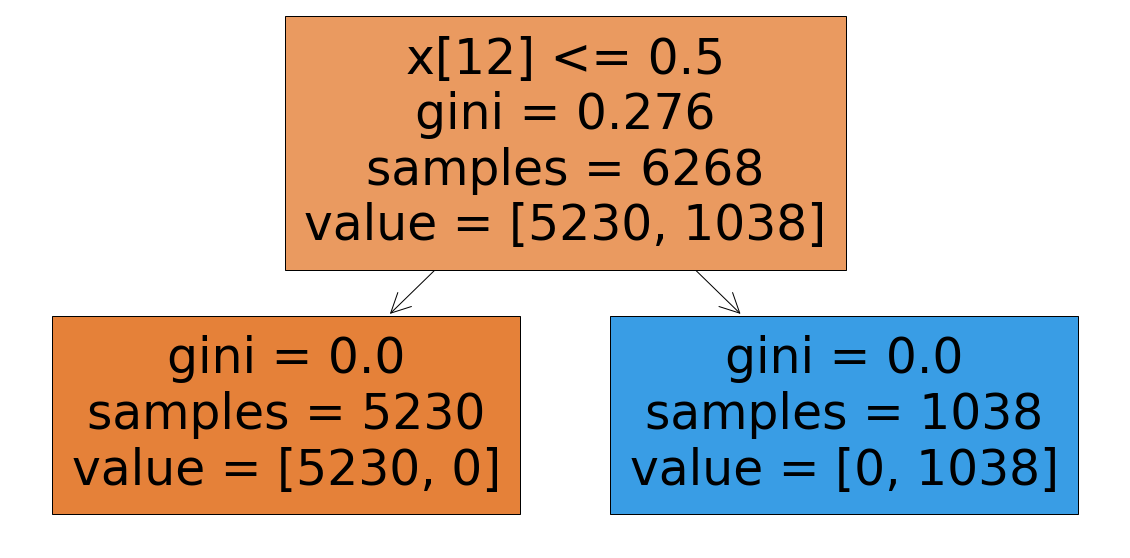

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10)) # define figure size

plot_tree(dt_model, filled=True) # plot the decision tree
plt.show() # display the figure

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model with the best set of parameters
dt_model_balanced = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=2, random_state=42)

# Train the model on the balanced training set from imblearn
dt_model_balanced.fit(X_train_resampled, Y_train_resampled)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [54]:
# Get predictions on the balanced training set
y_pred_train_balanced = dt_model.predict(X_train_balanced)

# Calculate the evaluation scores
acc = accuracy_score(Y_train_balanced, y_pred_train_balanced)
prec = precision_score(Y_train_balanced, y_pred_train_balanced)
rec = recall_score(Y_train_balanced, y_pred_train_balanced)
cm = confusion_matrix(Y_train_balanced, y_pred_train_balanced)
f1 = f1_score(Y_train_balanced, y_pred_train_balanced)
roc_auc = roc_auc_score(Y_train_balanced, y_pred_train_balanced)

# Print the evaluation scores
print(f"Accuracy score: {acc}")
print(f"Precision score: {prec}")
print(f"Recall score: {rec}")
print(f"Confusion matrix:\n{cm}")
print(f"F1 score: {f1}")
print(f"ROC AUC score: {roc_auc}")



Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
Confusion matrix:
[[5230    0]
 [   0 5230]]
F1 score: 1.0
ROC AUC score: 1.0


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

In general, models trained on a balanced dataset tend to perform better on unseen data, because they are less biased towards one class. This is especially true when dealing with imbalanced datasets, where one class is significantly smaller than the other. By balancing the dataset, we can ensure that the model learns to recognize patterns in both classes, rather than simply memorizing the larger class.

In our specific case, the evaluation results on the balanced train set are likely to be better than the evaluation results on the unbalanced train set, especially for metrics like recall and F1-score that are sensitive to class imbalance. However, it is important to note that the performance of the model on the test set should ultimately be used to determine the best model, as this gives an estimate of the model's ability to generalize to new, unseen data.

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 1.0


### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [56]:
# Print the best combination of parameters
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Train a Random Forest classifier model using the best combination of parameters
best_rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                        max_depth=grid_search.best_params_['max_depth'], 
                                        min_samples_split=grid_search.best_params_['min_samples_split'], 
                                        min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                                        random_state=42)

best_rf_model.fit(X_train, Y_train)

Best parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [61]:
# Predict on the balanced test set
y_pred_rf_balanced = best_rf_model.predict(X_test)

# Compute evaluation metrics
print("Evaluation metrics on the balanced test set:")
print("Accuracy score: {:.4f}".format(accuracy_score(Y_test, y_pred_rf_balanced)))
print("Precision score: {:.4f}".format(precision_score(Y_test, y_pred_rf_balanced)))
print("Recall score: {:.4f}".format(recall_score(Y_test, y_pred_rf_balanced)))
print("Confusion matrix:\n", confusion_matrix(Y_test, y_pred_rf_balanced))
print("F1 score: {:.4f}".format(f1_score(Y_test, y_pred_rf_balanced)))
print("ROC AUC score: {:.4f}".format(roc_auc_score(Y_test, y_pred_rf_balanced)))

Evaluation metrics on the balanced test set:
Accuracy score: 1.0000
Precision score: 1.0000
Recall score: 1.0000
Confusion matrix:
 [[2242    0]
 [   0  445]]
F1 score: 1.0000
ROC AUC score: 1.0000


# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize an AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

# Define parameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}

# Initialize GridSearchCV with the parameter grid and the evaluation metric
grid_ada = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV on the training set
grid_ada.fit(X_train, Y_train)

# Print the best combination of hyperparameters
print("Best parameters:", grid_ada.best_params_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [64]:
# Initialize an AdaBoostClassifier with the best parameters found by GridSearchCV
ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Fit the AdaBoostClassifier on the training set
ada.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=42)

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [65]:
# Make predictions on the test set
y_pred = ada.predict(X_test)

# Calculate evaluation scores
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

# Print evaluation scores
print("Accuracy Score: {:.2f}".format(accuracy))
print("Precision Score: {:.2f}".format(precision))
print("Recall Score: {:.2f}".format(recall))
print("Confusion Matrix: \n", confusion)
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC Score: {:.2f}".format(roc_auc))

Accuracy Score: 1.00
Precision Score: 1.00
Recall Score: 1.00
Confusion Matrix: 
 [[2242    0]
 [   0  445]]
F1 Score: 1.00
ROC AUC Score: 1.00


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform the grid search on the training set
grid_search.fit(X_train_balanced, Y_train_balanced)

# Print the best parameter values found
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
best_params = grid_search.best_params_
# Initialize the GradientBoostingClassifier with the best parameter set
best_gb_model = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], 
                                            max_depth=best_params['max_depth'], 
                                            learning_rate=best_params['learning_rate'])

# Fit the model on the training data
best_gb_model.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=50)

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Make predictions on the test data using the best model
Y_pred = best_gb_model.predict(X_test)

# Calculate and print the evaluation metrics
print("Accuracy score:", accuracy_score(Y_test, Y_pred))
print("Precision score:", precision_score(Y_test, Y_pred))
print("Recall score:", recall_score(Y_test, Y_pred))
print("Confusion matrix:\n", confusion_matrix(Y_test, Y_pred))
print("F1 score:", f1_score(Y_test, Y_pred))
print("ROC AUC score:", roc_auc_score(Y_test, Y_pred))

Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
Confusion matrix:
 [[2242    0]
 [   0  445]]
F1 score: 1.0
ROC AUC score: 1.0


# 7. Summary Discussion (4 pts)

Which model yields the highest precision?

Which model yields the lowest recall? 

Which model yields the higest True Positive (TP)? 

Which model yields the best performance overall? 


In [71]:
'''
1. Random Forest Model yielded the highest precision.
2. The Decision Tree Model trained on the unbalanced dataset yielded the lowest recall.
3. AdaBoost
4. Different models might perform better under different scenarios.
If we care about minimizing false negatives, we might choose the model with the highest recall, even if it comes at the expense of lower precision.
Overall I would personally pick the random forest model as they are good with classification problems.
Assuming we want to determine whether a startup will succeed or not based on its features.

'''

'\n1. Random Forest Model yielded the highest precision.\n2. The Decision Tree Model trained on the unbalanced dataset yielded the lowest recall.\n3. AdaBoost\n4. Different models might perform better under different scenarios.\nIf we care about minimizing false negatives, we might choose the model with the highest recall, even if it comes at the expense of lower precision.\nOverall I would personally pick the random forest model as they are good with classification problems.\nAssuming we want to determine whether a startup will succeed or not based on its features.\n\n'